# Analysis 3

In [13]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.path as path
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [25]:
df = pd.read_csv('cwurData.csv')
df.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


367


C:\Users\smrut\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


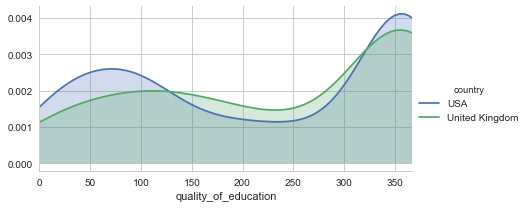

In [26]:
def return_quality(c):
    return df[df.country == c].quality_of_education.tolist()

us_quality = return_quality('USA')

df_c = df.loc[(df.country == "USA") | (df.country == "United Kingdom"), ['world_rank', 'country', 'quality_of_education']]
print(df_c['quality_of_education'].max())

facet = sns.FacetGrid(df_c, hue="country",aspect=2)
facet.map(sns.kdeplot,'quality_of_education',shade= True)
facet.set(xlim=(0, df_c['quality_of_education'].max()))
facet.add_legend()

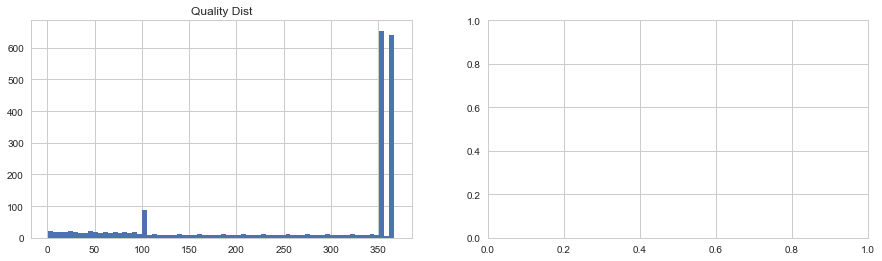

In [27]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Quality Dist')
df['quality_of_education'].dropna().astype(int).hist(bins=70, ax=axis1)